In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

** Atenção** : 

Funciona melhor no Jupyter Notebook com a extensão RISE. Para instalar faça
    !conda install -c conda-forge rise

Depois clique no botão parecido com a figura a seguir

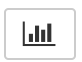



# Scikit-Learn

A principal biblioteca para Machine Learning em Python chama-se Scikit-Learn, ou de modo abreviado `sklearn`. Com esta biblioteca podemos construir modelos de aprendizado de máquina bem sofisticados, exceto para *deep learning*, onde outras bibliotecas são usadas (e.g. Keras, Theano, TensorFlow).

Visite a página do Scikit-Learn para conhecer mais: http://scikit-learn.org/stable/



Instale o `sklearn` na sua máquina com o comando:

```conda install scikit-learn```

Vamos demonstrar o uso da biblioteca `sklearn` em um problema familiar: classificação de tweets via Naive Bayes!

Vamos ler os dados (doados por um de seus colegas):

In [4]:
nescau_xlsx = 'tweets nescau classificação verificação.xlsx'

dados_train = pd.read_excel(nescau_xlsx, sheet_name ='Treinamento')
dados_test = pd.read_excel(nescau_xlsx, sheet_name ='Teste')

X_train = dados_train['Treinamento']
y_train = dados_train['Classificação']
X_test = dados_test['Teste']
y_test = dados_test['Classificação']

Agora vamos construir um classificador Naive-Bayes e treiná-lo com o conjunto de treinamento:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Cria modelo.
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", MultinomialNB())
])

# Treina modelo.
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Vamos agora testar a acurácia do modelo:

In [4]:
# Testa modelo.
y_pred = model.predict(X_test)

# Calcula acurácia.
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

Acurácia: 0.84


## Acurácia e precisão


Acurácia e precisão são métricas importantes para avaliar a qualidade de uma predição.

Sejam:
TP - True positive
TN - True negative
FP - False positive
FN - False negative

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$



 $Precision = \frac{TP}{TP+FP}$

Podemos usar o modelo para testar novos tweets à respeito do produto:

In [5]:
print(model.predict(['Nescau é alegria!', 'Nescau é pior que Toddy', 'Alguém viu meu laptop?']))

[1 1 0]


Podemos também verificar o quão confiante o classificador está à respeito da decisão:

In [6]:
print(model.predict_proba(['Nescau é alegria!', 'Nescau é pior que Toddy', 'Alguém viu meu laptop?']))

[[0.36304858 0.63695142]
 [0.00476114 0.99523886]
 [0.86088423 0.13911577]]


Estes números representam a probabilidade de que a sentença pertença a cada uma das classes.

**Atividade:** Aplique esta técnica ao seu próprio conjunto de tweets. Compare com a acurácia que você obteve em seu projeto.

# Iris

Vamos usar como exemplo um dos datasets mais famosos da estatística: a coleção de dados sobre flores do tipo Iris, [usada por R.A Fisher](https://en.wikipedia.org/wiki/Iris_flower_data_set) para desenvolver os fundamentos da teoria de aprendizado estatístico. O Scikit-Learn já vem com esse dataset embutido, para facilitar nossos experimentos!

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Em *machine learning* a variável dependente também é conhecida como *target*:

In [8]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


Costuma-se denominar as variáveis independentes de 'característica', ou *feature*:

In [9]:
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Vamos selecionar apenas as duas últimas características da lista ('petal length (cm)' e 'petal width (cm)') para nosso experimento.

In [10]:
X = iris.data[:, 2:4]
print(type(X))
print(X.shape)
print(X.dtype)
print(X[:5])

<class 'numpy.ndarray'>
(150, 2)
float64
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


Nosso objetivo é construir um modelo de classificação que separe as flores do tipo Virginica das demais. Para isso, vamos construir uma variável *target* que vale `True` para Virginicas, e `False` caso contrário. Em Numpy isso é simples, nada de loops `for` feios!

In [11]:
y = iris.target == 2

In [12]:
print(type(y))
print(y.shape)
print(y.dtype)
print(y[:5])

<class 'numpy.ndarray'>
(150,)
bool
[False False False False False]


Vamos visualizar as duas categorias em um *scatter plot*:

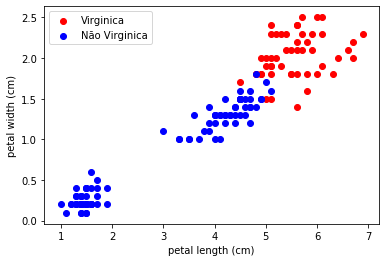

In [13]:
X_pos = X[y, :]
X_neg = X[~y, :]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color='r', label='Virginica')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='b', label='Não Virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend();

Se uma flor tiver comprimento petal de $5 cm$ e largura petal de $1,2 cm$, ela deve ser uma Iris Virginica ou não? Como treinar o computador para identificar o tipo de flor a partir dos nossos exemplos?

**Atividade:** Plote essa nova flor na cor verde no gráfico de dispersão acima (copie e cole o código).

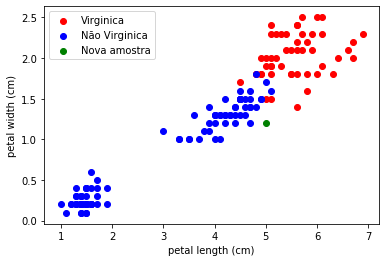

In [15]:
X_pos = X[y, :]
X_neg = X[~y, :]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color='r', label='Virginica')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='b', label='Não Virginica')
# Basta adicionar esta linha a seguir:
plt.scatter(5, 1.2, color='g', label='Nova amostra')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend();

# Separando treinamento e teste

Temos que dividir nosso conjunto de exemplos em duas partes: um conjunto de treinamento e um conjunto de testes. 

Por que? 

Pela mesma razão pela qual os professores não cobram na prova **literalmente** os mesmos exercícios que passamos em sala de aula, mas sim exercícios similares, de mesmo conceito! Se cobrarmos exatamente os mesmos exercícios não estamos medindo a capacidade de vocês de *generalizar* um conceito aprendido, mas sim estaremos medindo apenas sua capacidade de memorização de texto! 

O mesmo vale para nossos modelos de aprendizado de máquina. Podemos dizer que o conjunto de treinamento é a APS para estudar para a prova, e o conjunto de testes é a prova!

O `sklearn` já tem uma função para:

- Embaralhar as amostras de exemplo, e
- Separar os conjuntos de treinamento e teste.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

(Nota: este argumento `random_state=RANDOM_SEED` não é necessário em geral, só usamos aqui para garantir o mesmo resultado toda vez que rodarmos esse notebook, ok?)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 2), (100,), (50, 2), (50,))

**Atividade:** Verifique se a proporção de tipos de flor no conjunto de treinamento é similar à proporção no conjunto de testes.

In [20]:
conta_treinamento = pd.Series(y_train).value_counts()
conta_treinamento

False    66
True     34
dtype: int64

In [21]:
conta_teste = pd.Series(y_test).value_counts()
conta_teste

False    34
True     16
dtype: int64

In [22]:
conta_treinamento[True] / conta_treinamento[False]

0.5151515151515151

In [23]:
conta_teste[True] / conta_teste[False]

0.47058823529411764

Parece que a proporção de tipos de flor é similar entre treinamento e teste.

**ATENÇÃO: A PARTIR DE AGORA O CONJUNTO DE TESTES É INVIOLÁVEL!** Não olhe para ele, não respire perto dele, esqueça que ele existe! Você pode explorar o conjunto de treinamento o quanto quiser (estatística descritiva, testes de hipótese, etc), mas não mexa no conjunto de testes. Ele só deve ser usado no último instante, para calcular a acurácia definitiva do seu modelo.

**Atividade:** Por que esse tabu com o conjunto de testes? Pense na analogia da prova.

**R:** Porque olhar para o conjunto de teste antes de treinar o modelo pode fazer com que sejamos tendenciosos na construção do modelo de modo a aumentar a acurácia deste no conjunto de testes particular em uso, sem que esse aumento de desempenho seja "honesto". Ou seja: olhar o conjunto de testes antes de construir e treinar o modelo pode resultar em uma acurácia alta, mas não confiável.

Vamos agora construir e treinar um modelo chamado "Regressão Logística", que apesar do nome "regressão" é na verdade um modelo de classificação.

Funciona assim: Vamos imaginar que a probabilidade de que uma amostra pertença à categoria $1$ (ou 'positiva', ou 'relevante', como quiser) seja $p$, e consequentemente a probabilidade de que uma amostra pertença à categoria oposta ($0$, ou 'negativa', ou 'irrelevante, etc) será $1 - p$:

$$Prob(y = 1 | X = x) = p$$

e

$$Prob(y = 0 | X = x) = 1 - p$$

onde $X = (x_1, x_2)$, por exemplo. Podemos representar quão grande é a chance de $y = 1$ em relação à chance de $y = 0$ simplesmente obtendo a razão entre elas (*odds*):

$$odds = \frac{Prob(y = 1 | X = x)}{Prob(y = 0 | X = x)} = \frac{p}{1 - p}$$

Por exemplo, numa roleta de cassino a chance de perder é $36/37$ e a chance de ganhar é $1/37$, logo $odds = 1 \text{ para } 36$. 

No modelo de regressão logística, vamos fazer algo parecido com a regressão linear, mas desta vez a variável dependente será o logaritmo da chance (chamado de "logito"):

$$\log{\left(\frac{p}{1 - p}\right)} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

Com um pouco de álgebra (aplica função exponencial dos dois lados, isola $p$) chegamos na seguinte expressão:

$$Prob(y = 1 | X = x) = \frac{1}{1 + e^{-\left(\beta_0 + \beta_1 x_1 + \beta_2 x_2\right)}}$$

Esta função é conhecida como **função logística**. Eis a cara da função logística padrão:

$$f(x) = \frac{1}{1 + e^{-x}}$$

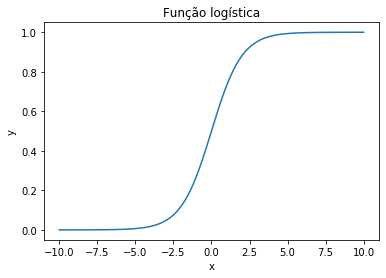

In [24]:
x_logistica = np.linspace(-10, 10, 500)
y_logistica = 1/(1 + np.exp(-x_logistica))

plt.plot(x_logistica, y_logistica)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função logística');

Para usar este modelo para classificação basta definir um ponto de corte: se $Prob(y = 1 | X = x) > corte$ dizemos que a amostra pertence à classe $1$, caso contrário pertence à classe $0$. Normalmente usamos $corte = 0.5$.

Vamos criar o modelo de regressão logística:

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto')

Treinar o modelo de regressão logística significa ajustar os valores de $\beta_i$ tal que a acurácia seja maximizada. Felizmente o Scikit-Learn faz isso facilmente para a gente:

In [26]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Agora podemos testar a acurácia 

In [27]:
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 1.0


Parece que o modelo tem grande acurácia na discriminação entre Iris Virginica e outros tipos! Podemos agora usar o nosso modelo para decidir se a flor do início desta seção é ou não uma Iris Virginica:

In [28]:
print(model.predict([[5, 1.2]]))

[False]


A flor não é uma Iris Virginica.

## Trocando de modelo

Com Scikit-Learn é fácil testar outros modelos. Vamos experimentar com um modelo chamado "Random Forests":

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Atividade: Tente escrever você mesmo o código de criação, treinamento e teste do modelo.
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 1.0


Nada mal!

# MNIST

(Esta seção usa material adaptado do livro "Hands-On Machine Leaning with Scikit-Learn and TensorFlow", de Aurélien Géron.)

Neste último exemplo a base de dados que utilizaremos é conhecida como MNIST ("Modified National Institute of Standards and Technology"), e deriva de uma base maior que foi construida pela NIST nos Estados Unidos (o equivalente da nossa ABNT). Esta base de dados é considerada o verdadeiro "Hello, world!" de métodos de classificação. Em http://yann.lecun.com/exdb/mnist/ temos uma descrição mais detalhada desta base de dados.

O scikit-learn já tem ferramentas para baixar e disponibilizar alguns dos datasets mais comuns da comunidade de machine learning, incluindo o MNIST. Estes datasets estão disponíveis em https://www.openml.org/: tem mais de 20000 datasets diferentes lá!

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

In [32]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

No campo `data` temos as várias imagens de dígitos manuscritos. Cada item é uma lista de $28^2 = 784$ valores, que são os valores dos pixels - as imagens são todas $28 \times 28$.

No campo `target` temos o rótulo de cada uma dessas imagens.

In [33]:
X = mnist['data']
y = mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [36]:
X.dtype

dtype('float64')

In [38]:
y.dtype

dtype('O')

**Atividade:** Quantas *features* (variáveis independentes) temos neste problema?

**R:** 784

**Atividade:** Quantos pontos de dados temos?

**R**: 70000

**Atividade:** A variável dependente é discreta ou contínua? Categórica ou ordinal? 

**R:** categórica

**Atividade:** Quantas classes temos neste problema?

**R:** 10

Vamos ver um desses dígitos manuscritos para checar se a leitura de dados funcionou:

label: 5


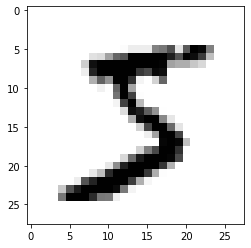

In [39]:
some_digit = X[0]
some_digit_label = y[0]

print('label: {}'.format(some_digit_label))

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Parece que deu certo: pela imagem trata-se de um dígito $5$ manuscrito, e de fato o rótulo confirma essa observação.

# Separando treinamento e teste

Conforme visto na descrição do dataset MNIST, a separação entre conjunto de treinamento e teste já está feita. Os primeiros 60000 exemplos são o conjunto de treinamento e os últimos 10000 exemplos são o conjunto de teste.

In [40]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [41]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [42]:
pd.Series(y_test).value_counts().sort_index()

0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

Vamos ver mais alguns digitos desta base:

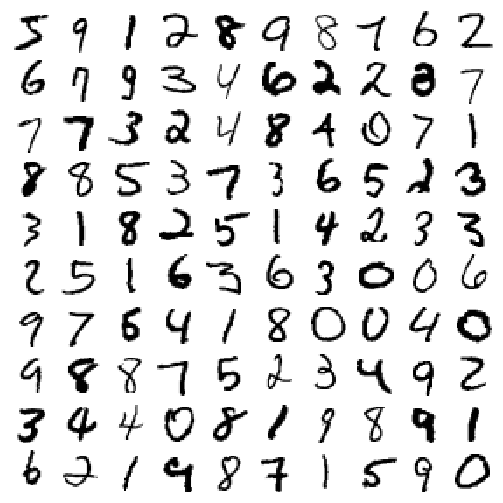

In [43]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

# Classificação binária

Vamos começar com um problema mais simples: classificar os dígitos da base em 'cincos' e 'não-cincos'. Este é um problema de classificação binária, como o problema anterior das flores Iris. Por mera convenção, chamaremos de 'amostras positivas', ou simplemente 'positivos' os digitos $5$ e de 'negativos' os demais dígitos.

Vamos adaptar os conjuntos de treinamento e teste ao nosso cenário:

In [44]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [45]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

Verificando se funcionou:

In [46]:
n = 20
for original, binarized in zip(y_train[:n], y_train_5[:n]):
    print('{} -> {}'.format(original, binarized))

5 -> True
0 -> False
4 -> False
1 -> False
9 -> False
2 -> False
1 -> False
3 -> False
1 -> False
4 -> False
3 -> False
5 -> True
3 -> False
6 -> False
1 -> False
7 -> False
2 -> False
8 -> False
6 -> False
9 -> False


Vamos agora treinar um classificador sobre todo o conjunto de treinamento. Vamos usar um classificador chamado *Stochastic Gradient Descent*, que é uma generalização de alguns tipos diferentes de classificadores mais tradicionais. O scikit-learn tem uma classe que implementa este classificador: `SGDClassifier`. Com os parâmetros *default* desta classe, o classificador SGD é equivalente a um classificador do tipo "máquina de vetores de suporte linear".

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=None, random_state=RANDOM_SEED)  # Existe aleatoriedade dentro do SGDClassifier.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

Vamos testar o classificador naquele dígito $5$ que a gente tinha visualizado no começo do notebook:

In [64]:
sgd_clf.predict([some_digit])

array([ True])

Perfeito, ele acertou! Mas isso foi apenas um exemplo, vamos agora estudar o desempenho do classificador.

**Atividade:** Determine a acurácia do classificador.

In [65]:
y_pred_mnist = sgd_clf.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test_5, y_pred_mnist)))

Acurácia: 0.9694


**Atividade:** Seria MUITO fácil obter acurácia 90% neste problema. Não precisa nem treinar! Explique como!

**R:**

**Atividade**: Repita o processo de treinamento e teste do classificador usando LogisticRegression e usando RandomForestClassifier, compare as acurácias obtidas.

In [68]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train_5)
y_pred_forest = forest_clf.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test_5, y_pred_forest)))

Acurácia: 0.9885


# Conclusão

Nesta aula vimos um pouco (muito pouco!) do universo de Machine Learning. Existe muito mais a ser estudado! Para quem se interessa pelo assunto, recomendo o livro "Hands-On Machine Leaning with Scikit-Learn and TensorFlow", de Aurélien Géron, que é o livro-texto da disciplina optativa "Machine Learning", a ser oferecida no primeiro semestre de cada ano. Para quem quer conhecer mais sobre a parte teórica de aprendizado estatistico, recomendo o livro "The Elements of Statistical Learning: Data Mining, Inference, and Prediction.", de Trevor Hastie, Robert Tibshirani e Jerome Friedman, que pode ser obtido gratuitamente em https://web.stanford.edu/~hastie/ElemStatLearn/ . Bons estudos!

Veja o [enunciado do Projeto 3 - edição 2019]() para mais referências.